In [51]:
# All the csvs we are reading in has exactly 25 rows
# every 5 row correspond to a particular (# of function, # of DE) combination.
# Which gives us 20 different combos in total.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
raw_df = pd.read_csv("block100.csv", header=None)
raw_arr = np.array(raw_df).reshape(5, 5, 5)

In [53]:
med_array = []
for i in range(5):
    cur_med = np.median(raw_arr[i], axis=0)
    med_array.append(cur_med)
med_array = np.transpose(med_array)

In [54]:
# Set labels for the x-axis
num_DE = ["10", "100", "500", "1000", "5000"]

In [55]:
# Taking a look at med_array (each column corresponds to a different # of DE)
# Different rows corresponds to overhead from different components of the DS

med_array

array([[2.72512436e-03, 2.74634361e-03, 2.70485878e-03, 2.82025337e-03,
        2.93040276e-03],
       [2.54061222e-02, 2.41535664e-01, 1.22657418e+00, 2.43719363e+00,
        1.15820050e+01],
       [3.43441963e-03, 5.75613976e-03, 1.62622929e-02, 2.96602249e-02,
        1.38812304e-01],
       [8.19420815e-03, 9.91964340e-03, 1.00026131e-02, 1.18255615e-02,
        1.89423561e-02],
       [1.87349319e-03, 3.10683250e-03, 2.70938873e-03, 3.08465958e-03,
        2.93374062e-03]])

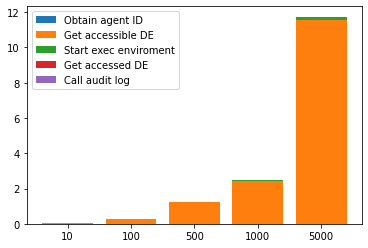

In [56]:
fig, ax = plt.subplots()
ax.bar(num_DE, med_array[0], label='Obtain agent ID')
ax.bar(num_DE, med_array[1], bottom=med_array[0], label='Get accessible DE')
ax.bar(num_DE, med_array[2], bottom=med_array[0]+med_array[1], label='Start exec enviroment')
ax.bar(num_DE, med_array[3], bottom=med_array[0]+med_array[1]+med_array[2], label='Get accessed DE')
ax.bar(num_DE, med_array[4], bottom=med_array[0]+med_array[1]+med_array[2]+med_array[3], label='Call audit log')
ax.legend()
plt.show()